In [5]:
#import PIL.Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack

In [7]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
#from PIL import Image
import pandas as pd
import pickle

In [8]:
data = pd.read_json('tops_fashion.json')


ValueError: Unexpected character found when decoding 'true'

In [9]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

NameError: name 'data' is not defined

In [4]:
data = data.loc[~data['formatted_price'].isnull()]
data =data.loc[~data['color'].isnull()]
data.shape

(28385, 7)

In [5]:
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
data_sorted.sort_values('title',inplace=True, ascending=False)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
data_sorted.shape

(27949, 7)

In [4]:

data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')

In [5]:
def display_img(url):
    
    response = requests.get(url)
    img = PIL.Image.open(BytesIO(response.content))
    
    plt.imshow(img)
def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    
    display_img(url)
    
    plt.show()

In [6]:
stop_words = set(stopwords.words('english'))
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            
            word = ("".join(e for e in words if e.isalnum()))
            
            word = word.lower()
            
            if not word in stop_words:
                string += word + " "
        data[column][index] = string
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')

In [13]:
import pickle
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

vocab = model.keys()

def build_avg_vec(sentence, num_features, doc_id, m_name,Wt):
    

    featureVec = np.zeros((num_features,), dtype="float32")
    
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * (model[word]*Wt))
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    
    return featureVec
#________________________________________________________________________________________________________________________________
def W2v(Wt):
    idf_title_vectorizer = CountVectorizer()
    idf_title_features = idf_title_vectorizer.fit_transform(data['title'])
    doc_id = 0
    w2v_title_weight = []
    # for every title we build a weighted vector representation
    for i in data['title']:
        w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted',Wt))
        doc_id += 1
    # w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
    w2v_title_weight = np.array(w2v_title_weight)
    return w2v_title_weight
#________________________________________________________________________________________________________________________________
def Image(Wi):
    bottleneck_features_train = np.load('16k_data_cnn_features.npy')
    B=bottleneck_features_train*Wi
    return B

In [8]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

In [20]:
def P(extra_features,num_results,Doc_ID=2):
   
    pairwise_dist = pairwise_distances(extra_features,extra_features[Doc_ID])
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print('TITLE :',data['title'].loc[df_indices[i]])
        #print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

def RESULTW2vBrandColor(Wi,Wt,Wb,Wc,num_results,Doc_ID):

    w2v_title_weight=W2v(Wt)
    bottleneck_features_train=Image(Wi)
    data['brand'].fillna(value="Not given", inplace=True )

    
    brands = [x.replace(" ", "-") for x in data['brand'].values]

    colors = [x.replace(" ", "-") for x in data['color'].values]

    brand_vectorizer = CountVectorizer()
    brand_features = brand_vectorizer.fit_transform(brands)
    color_vectorizer = CountVectorizer()
    color_features = color_vectorizer.fit_transform(colors)
    Z=hstack((brand_features*Wb, color_features*Wc,w2v_title_weight,bottleneck_features_train)).tocsr()
    
    P(Z,num_results,Doc_ID)
    


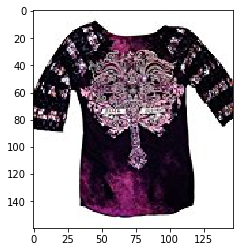

ASIN : B01NAZ3L3C
BRAND : Fifth Degree
TITLE : vein womens angels diamonds 34 sequin sleeve cross rhinestone printed top shirt l 


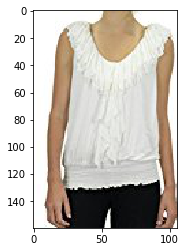

ASIN : B01I5GRO18
BRAND : FIFTEEN TWENTY
TITLE : fifteentwenty womens shirred hem ruffle blouse eggshell medium 


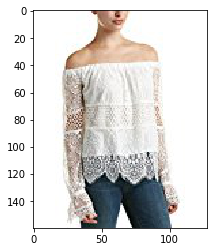

ASIN : B071KG15YM
BRAND : KENDALL + KYLIE
TITLE : kendall kylie womens lace blouse white 


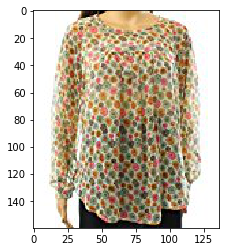

ASIN : B071FTFS74
BRAND : Elodie
TITLE : elodie pink womens floral pleated sheer blouse green xs 


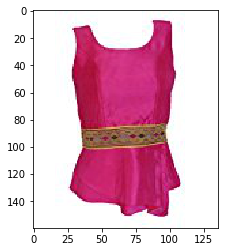

ASIN : B074JCDGWM
BRAND : Nanon
TITLE : pink lao laos laotian sleeveless blouse classic neckline tops size 36 sl36b 


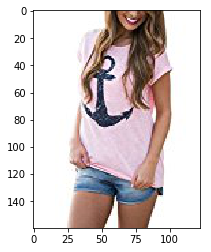

ASIN : B01GJEE4S4
BRAND : YesFashion
TITLE : yesfashion womens casual round collar short sleeve tshirt blouse tops 


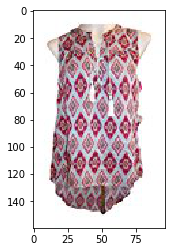

ASIN : B071XX6JBT
BRAND : Xhilaration
TITLE : xhilaration womens hilo tank greymulticolor small 


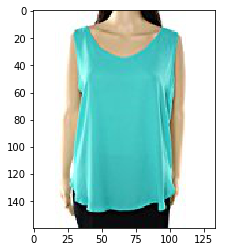

ASIN : B01LYZUU5P
BRAND : Soprano
TITLE : soprano seaglass large junior vneck chiffon tank blouse blue l 


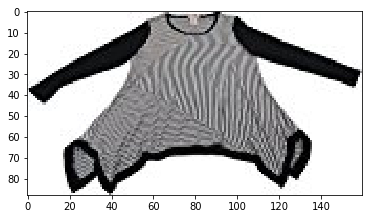

ASIN : B01KGENTGQ
BRAND : Philosophy
TITLE : philosophy ladies small long sleeve womens sharkbite tee blackwhite stripe 


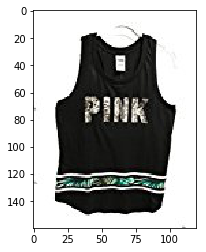

ASIN : B01N1SSW9Q
BRAND : V.Secret
TITLE : victoria secret pink bling logo tee small black 


In [21]:
#This Function Generates The Recommendations For You.

#________________________________________________________________________________________________________________________________


RESULTW2vBrandColor(1,1,1,1,10,Doc_ID=10) #Pass Wi,Wt,Wb,Wc,Num_results,Doc_ID


#_______________________________________________________________________________________________________________________________

